# Exploratory Data Analysis 

### Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [7]:
Data = pd.read_csv('vgsales.csv')
Data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
Data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
Data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [20]:
platGenre = pd.crosstab(Data.Platform,Data.Genre)
platGenre.head(5)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


In [23]:
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
platGenreTotal.head(5)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
dtype: int64

### PLOT

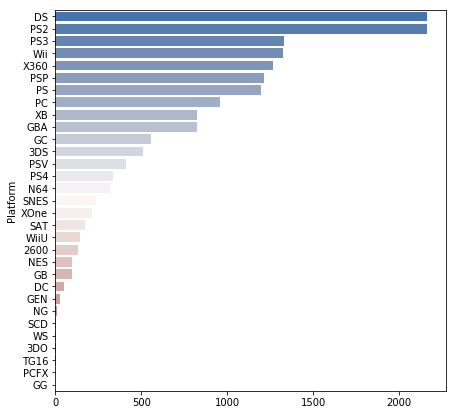

In [27]:
plt.figure(figsize=(7,7))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h',palette="vlag")
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

### Games according to Genre

Text(0.5, 1.0, 'Games According to Genre')

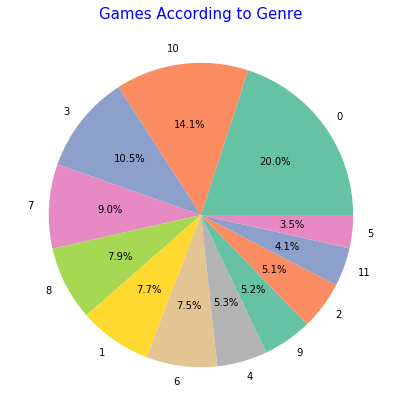

In [63]:
labels= Data.Genre.value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0]
sizes = Data.Genre.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Games According to Genre',fontsize = 15,color = 'blue')

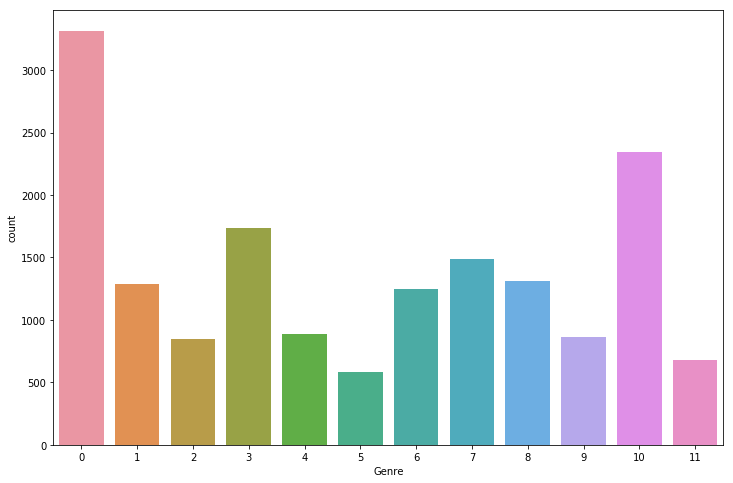

In [64]:
plt.figure(figsize=(12,8))
sns.countplot(x='Genre',data=Data)
plt.show()

### GROUPING

<Figure size 720x720 with 0 Axes>

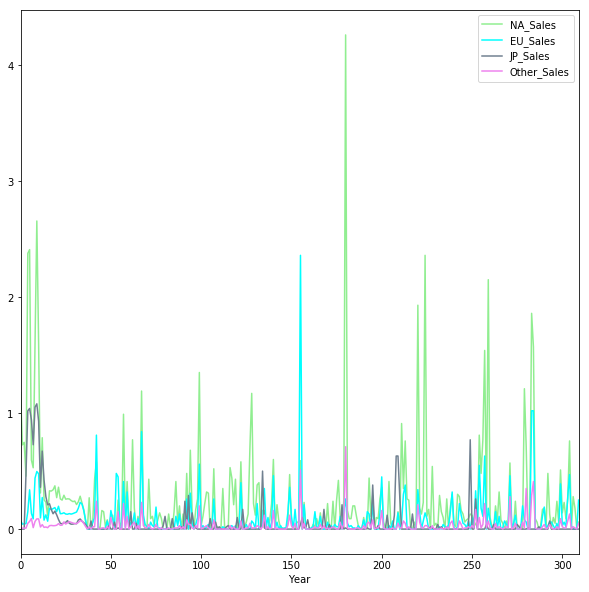

In [80]:
df = Data.groupby(['Year'])

plt.figure(figsize=(10,10))
df_mean = df['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
df_mean.plot(figsize=(10,10),color=['lightgreen','cyan','slategray','violet'])

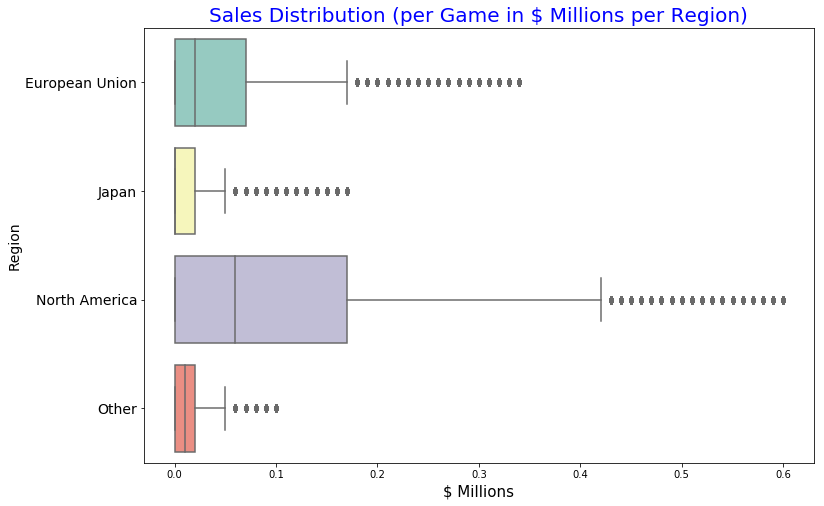

In [68]:
data = Data
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sns.color_palette("Set3", len(Data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='$ Millions', fontsize=15)
ax.set_ylabel(ylabel='Region', fontsize=14)
ax.set_title(label='Sales Distribution (per Game in $ Millions per Region)', fontsize=20, color='blue')
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

### Correlation

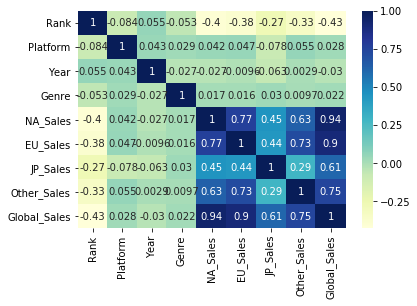

In [66]:
sns.heatmap(Data.corr(),cbar=True,annot=True, cmap="YlGnBu")
#sns.heatmap(Data.corr(),cbar=True,annot=True, cmap=sns.cubehelix_palette(8))


### Word Cloud

In [69]:
word = WordCloud(background_color="white", max_words=1000, 
                stopwords=stopwords, max_font_size=40, random_state=42)
word

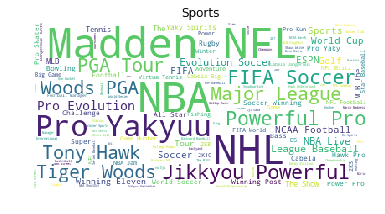

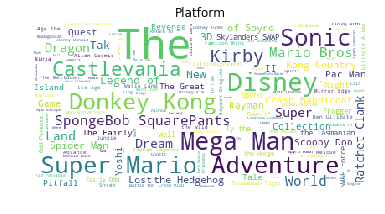

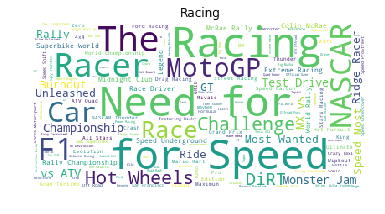

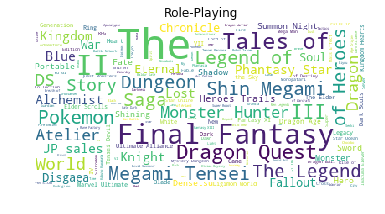

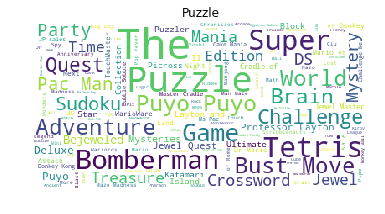

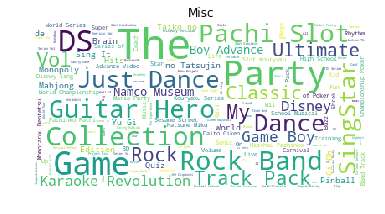

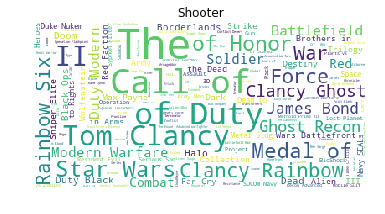

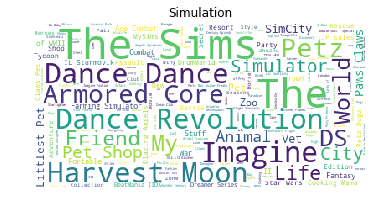

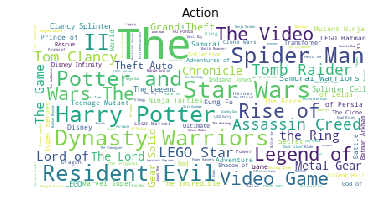

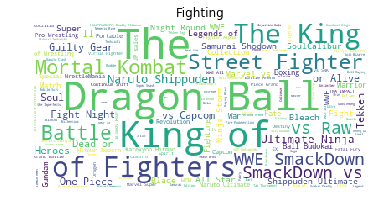

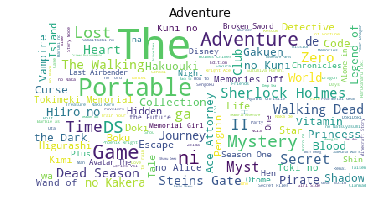

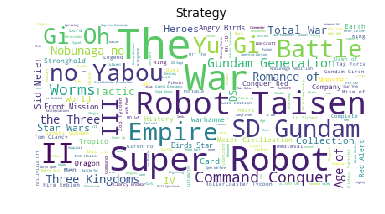

In [70]:
stopwords = set(STOPWORDS)

for i in vgs.Genre.unique():
    word = WordCloud(background_color="white", max_words=3000, 
                   stopwords=stopwords, max_font_size=50, random_state=42)
    word.generate(vgs.Name[vgs.Genre == i].to_string())
    plt.imshow(word)
    plt.title(i)
    plt.axis("off")
    plt.show()

# MODEL

In [ ]:
the model
from sklearn.metrics import mean_absolute_error # mean absolute error , error = predictions - validation_y then abs for pos value
from sklearn.tree import DecisionTreeRegressor #model
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']#our features
X = cop[features]
y = cop.Global_Sales #target
train_X , val_X , train_y , val_y = train_test_split(X,y,test_size=0.25,random_state=1)
model = DecisionTreeRegressor(random_state=1)
model.fit(train_X,train_y)

In [ ]:
mae = mean_absolute_error(predictions, val_y)
print('Mean absolute error '+str(mae))

In [ ]:
df = pd.DataFrame({'Actual': val_y, 'Predicted': predictions})
df

In [ ]:
df1 = df.head(80)
df1.plot(kind='bar',figsize=(15,8))
plt.show()

In [ ]:
val_X['Global_Sales']=predictions
print(len(df.index))
val_X['Rank'] = df.index
val_X[['Rank','Global_Sales']].to_csv('sub_for_nothing.csv',index=False)
df.to_csv('predvsval_y.csv',index=False)